<a href="https://colab.research.google.com/github/rsadaphule/jhu-cv/blob/main/JHV_CV___HW_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Computer Vision Class - HW 5

1. Use CIFAR-10 data set of resolution (32x32) and train an AlexNet-like
network as shown in the diagram on the right for 10 classes. Plot
learning curves and classification performance + confusion matrix.
Use the training and testing dataset specified in the CIFAR-10 database
(https://www.cs.toronto.edu/~kriz/cifar.html)
• Use the kernel size 3x3 and the number of kernel as shown in the
diagram.
• Replace the FC layers of AlexNet to FC-512, FC-256 as shown in the
diagram.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [ ]:
# Step 1: Load and preprocess CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
# Step 2: Define the architecture of the AlexNet-like network
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(192, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(192, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Step 3: Train the network
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 15s 6ms/step - loss: 1.5537 - accuracy: 0.4243 - val_loss: 1.2927 - val_accuracy: 0.5415
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0804 - accuracy: 0.6137 - val_loss: 0.9841 - val_accuracy: 0.6550
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8747 - accuracy: 0.6911 - val_loss: 0.9323 - val_accuracy: 0.6795
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7382 - accuracy: 0.7407 - val_loss: 0.8126 - val_accuracy: 0.7229
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6260 - accuracy: 0.7801 - val_loss: 0.8520 - val_accuracy: 0.7151
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5491 - accuracy: 0.8062 - val_loss: 0.8278 - val_accuracy: 0.7271
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4627 - accuracy: 0.8372 - val_loss: 0.8182 - val_accuracy

In [ ]:
# Step 4: Evaluate the trained network
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 1.0819 - accuracy: 0.7264
Test accuracy: 0.7264000177383423


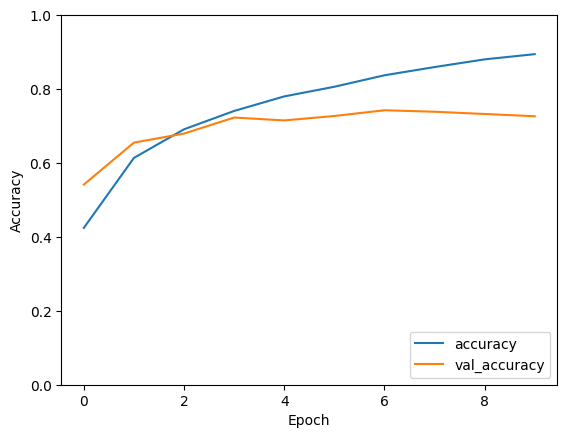

In [ ]:
# Step 5: Plot learning curves
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

313/313 [==============================] - 1s 2ms/step


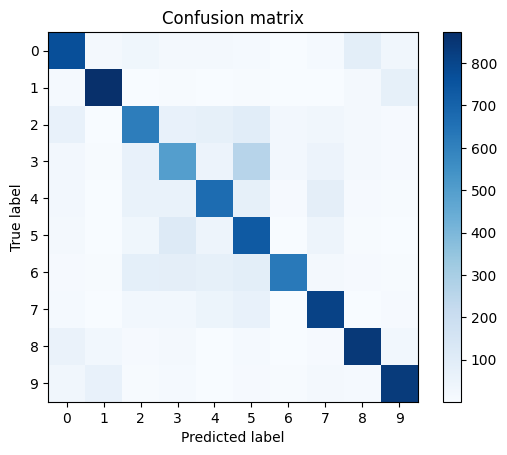

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1000
           1       0.86      0.87      0.87      1000
           2       0.66      0.61      0.63      1000
           3       0.55      0.50      0.52      1000
           4       0.68      0.67      0.68      1000
           5       0.54      0.73      0.62      1000
           6       0.89      0.62      0.74      1000
           7       0.75      0.81      0.78      1000
           8       0.82      0.84      0.83      1000
           9       0.83      0.83      0.83      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.74      0.73      0.73     10000



In [ ]:
# Plot confusion matrix
predictions = np.argmax(model.predict(test_images), axis=-1)
cm = confusion_matrix(test_labels, predictions)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Print classification report
print(classification_report(test_labels, predictions))

2. Repeat the experiment (retrain) with deleting only the Layer 5
Conv_256 + its max-pooling. Plot learning curves and classification
performance + confusion Matrix.

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 1.3239 - accuracy: 0.5229 - val_loss: 0.9911 - val_accuracy: 0.6469
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8735 - accuracy: 0.6922 - val_loss: 0.8416 - val_accuracy: 0.7093
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6790 - accuracy: 0.7621 - val_loss: 0.8094 - val_accuracy: 0.7282
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5416 - accuracy: 0.8113 - val_loss: 0.7607 - val_accuracy: 0.7471
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4267 - accuracy: 0.8482 - val_loss: 0.8015 - val_accuracy: 0.7447
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3128 - accuracy: 0.8885 - val_loss: 0.8835 - val_accuracy: 0.7410
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2315 - accuracy: 0.9173 - val_loss: 1.0006 - val_accuracy:

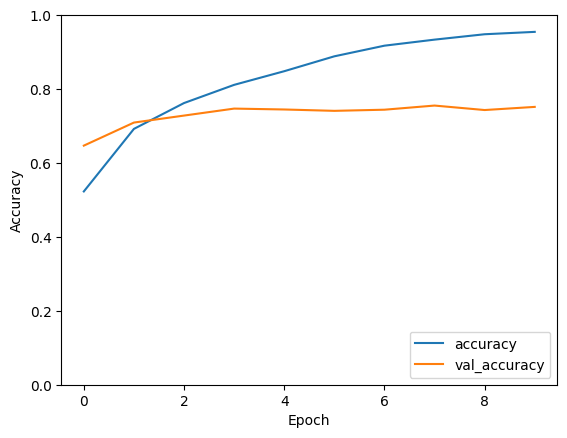

313/313 [==============================] - 1s 2ms/step


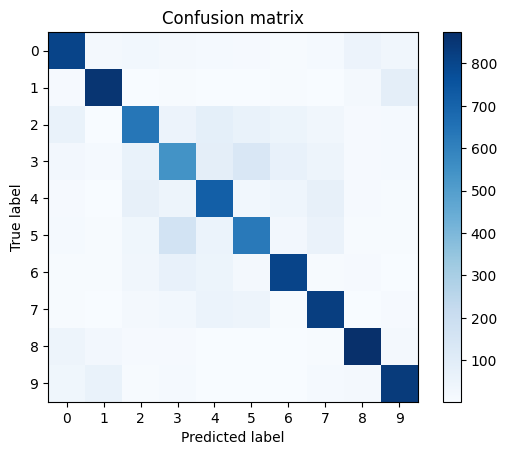

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1000
           1       0.86      0.86      0.86      1000
           2       0.70      0.64      0.67      1000
           3       0.57      0.54      0.56      1000
           4       0.67      0.71      0.69      1000
           5       0.67      0.63      0.65      1000
           6       0.79      0.81      0.80      1000
           7       0.77      0.82      0.79      1000
           8       0.86      0.87      0.87      1000
           9       0.81      0.83      0.82      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [ ]:

# Step 2: Define the modified architecture of the network
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(192, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 3: Train the modified network
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Step 4: Evaluate the trained network
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Step 5: Plot learning curves
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix
predictions = np.argmax(model.predict(test_images), axis=-1)
cm = confusion_matrix(test_labels, predictions)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Print classification report
print(classification_report(test_labels, predictions))

3. Repeat the experiment with deleting only the layer 4 Conv-192. Plot
learning curves and classification performance + confusion matrix



Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 1.4403 - accuracy: 0.4709 - val_loss: 1.2069 - val_accuracy: 0.5724
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9577 - accuracy: 0.6612 - val_loss: 0.8635 - val_accuracy: 0.7032
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7664 - accuracy: 0.7306 - val_loss: 0.8443 - val_accuracy: 0.7053
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6383 - accuracy: 0.7736 - val_loss: 0.7543 - val_accuracy: 0.7403
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5326 - accuracy: 0.8121 - val_loss: 0.7373 - val_accuracy: 0.7608
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4390 - accuracy: 0.8458 - val_loss: 0.7627 - val_accuracy: 0.7572
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3614 - accuracy: 0.8726 - val_loss: 0.8614 - val_accuracy

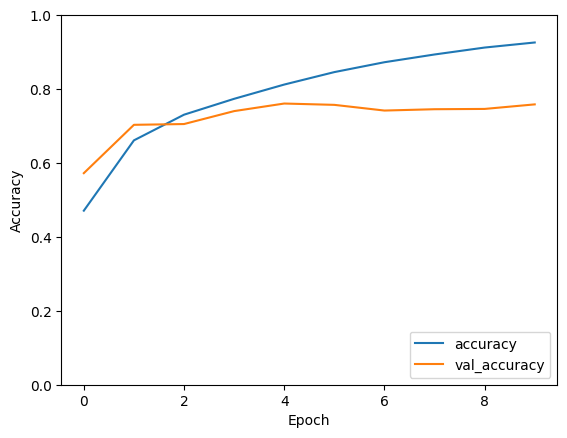

313/313 [==============================] - 1s 2ms/step


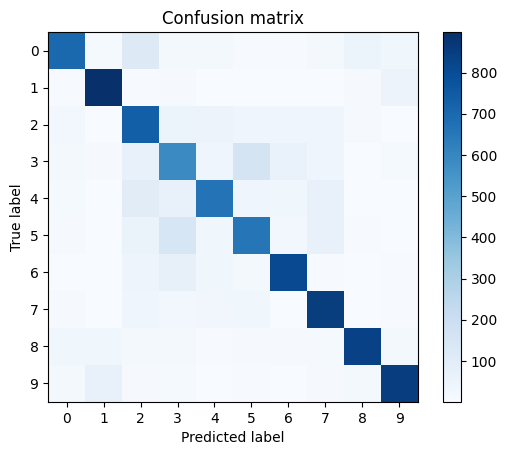

              precision    recall  f1-score   support

           0       0.84      0.70      0.76      1000
           1       0.87      0.90      0.88      1000
           2       0.61      0.73      0.67      1000
           3       0.58      0.59      0.58      1000
           4       0.75      0.67      0.71      1000
           5       0.67      0.66      0.67      1000
           6       0.81      0.81      0.81      1000
           7       0.76      0.85      0.80      1000
           8       0.88      0.84      0.86      1000
           9       0.86      0.85      0.85      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



In [ ]:
# Step 2: Define the architecture of the AlexNet-like network
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(192, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 3: Train the modified network
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Step 4: Evaluate the trained network
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Step 5: Plot learning curves
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix
predictions = np.argmax(model.predict(test_images), axis=-1)
cm = confusion_matrix(test_labels, predictions)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Print classification report
print(classification_report(test_labels, predictions))

4. Repeat the experiment with deleting the FC layer 6. Plot learning
curves and classification performance + confusion matrix.

Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 1.5557 - accuracy: 0.4266 - val_loss: 1.2735 - val_accuracy: 0.5493
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0589 - accuracy: 0.6213 - val_loss: 0.9592 - val_accuracy: 0.6637
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8633 - accuracy: 0.6962 - val_loss: 0.8368 - val_accuracy: 0.7029
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7418 - accuracy: 0.7374 - val_loss: 0.8130 - val_accuracy: 0.7195
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6419 - accuracy: 0.7730 - val_loss: 0.7802 - val_accuracy: 0.7356
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5557 - accuracy: 0.8033 - val_loss: 0.7705 - val_accuracy: 0.7393
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4758 - accuracy: 0.8324 - val_loss: 0.7801 - val_accuracy

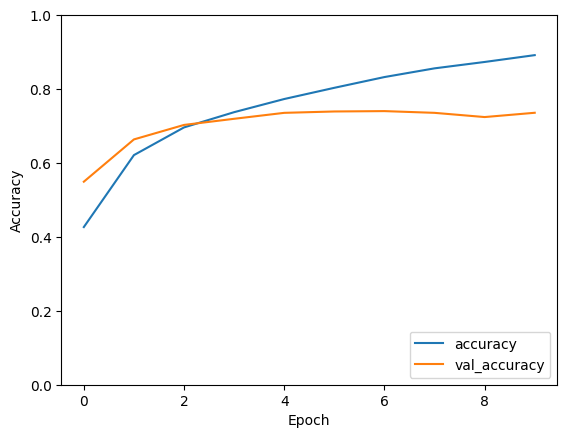

313/313 [==============================] - 1s 2ms/step


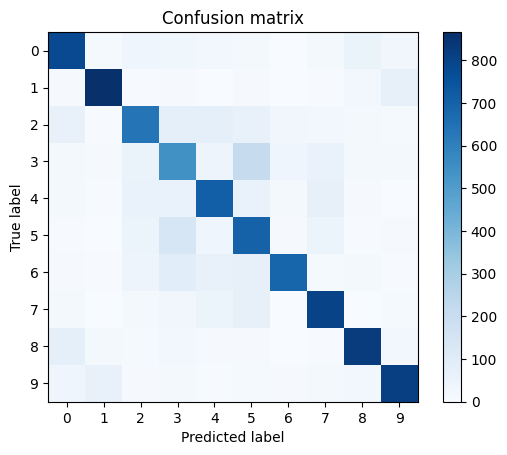

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1000
           1       0.88      0.87      0.87      1000
           2       0.69      0.64      0.66      1000
           3       0.53      0.54      0.54      1000
           4       0.70      0.71      0.71      1000
           5       0.57      0.70      0.63      1000
           6       0.87      0.69      0.77      1000
           7       0.76      0.80      0.78      1000
           8       0.83      0.82      0.83      1000
           9       0.82      0.81      0.82      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



In [ ]:
# Step 2: Define the architecture of the AlexNet-like network
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(192, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(192, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 3: Train the modified network
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Step 4: Evaluate the trained network
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Step 5: Plot learning curves
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix
predictions = np.argmax(model.predict(test_images), axis=-1)
cm = confusion_matrix(test_labels, predictions)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Print classification report
print(classification_report(test_labels, predictions))

# Summary:
Here is summary of all experiements.
```
Model.                |  Accuracy  
----------------------|---------------
Original              | 0.73  
After Deleting layer 5| 0.75   
After Deleting layer 4| 0.76   
After Deleting layer 6| 0.74   
```

As you can see accuracy of all experiements is pretty close to each other